In [1]:
!pip install opencv-python

In [5]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [9]:
!pip install --upgrade h5py keras

In [13]:
# Charger le modèle
model = load_model('./models/facenet_keras.h5')

# Sauvegarder le modèle au format SavedModel
model.save('facenet_keras_savedmodel')


EOFError: EOF read where object expected

In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [28]:
image = cv2.imread("C:/Users/mahen/Intranet/Modele_IA/images/profil_picture/selena_profile_picture.jpg")

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [5]:
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [6]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

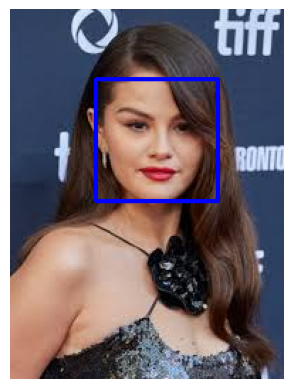

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
images = "C:/Users/mahen/Intranet/Modele_IA/images/picture/selena_picture_1.jpg"

In [19]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [20]:
def load_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

In [21]:
def detect_faces(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
    return faces

In [22]:
def draw_faces(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return image


In [24]:
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [23]:
def align_face(image, face):
    (x, y, w, h) = face
    face_region = image[y:y+h, x:x+w]
    gray_face = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)

    # Détecter les yeux dans la région du visage
    eyes = eye_cascade.detectMultiScale(gray_face)
    
    # Vérifier qu'au moins deux yeux sont détectés
    if len(eyes) >= 2:
        # Prendre les deux premiers yeux détectés
        eye_1 = eyes[0]
        eye_2 = eyes[1]

        # Coordonner les yeux
        eye_1_center = (x + eye_1[0] + eye_1[2] // 2, y + eye_1[1] + eye_1[3] // 2)
        eye_2_center = (x + eye_2[0] + eye_2[2] // 2, y + eye_2[1] + eye_2[3] // 2)

        # Calculer lequel est l'œil gauche et lequel est l'œil droit
        if eye_1_center[0] < eye_2_center[0]:
            left_eye = eye_1_center
            right_eye = eye_2_center
        else:
            left_eye = eye_2_center
            right_eye = eye_1_center

        # Calculer l'angle d'inclinaison du visage
        delta_x = right_eye[0] - left_eye[0]
        delta_y = right_eye[1] - left_eye[1]
        angle = np.arctan2(delta_y, delta_x) * 180.0 / np.pi

        # Calculer le centre des yeux
        eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

        # Créer la matrice de rotation pour aligner le visage
        rotation_matrix = cv2.getRotationMatrix2D(eyes_center, angle, scale=1)

        # Appliquer la transformation
        aligned_face = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

        return aligned_face
    else:
        print("Moins de deux yeux détectés, alignement non effectué.")
        return image

In [25]:
def process_image(image_path):
    image, gray_image = load_image(image_path)
    faces = detect_faces(gray_image)

    if len(faces) == 0:
        print("Aucun visage détecté.")
        return

    # Aligner chaque visage
    for face in faces:
        image_with_faces = draw_faces(image, [face])  # Dessiner des rectangles autour des visages
        aligned_face = align_face(image_with_faces, face)  # Aligner les visages
        display_image(aligned_face)

Moins de deux yeux détectés, alignement non effectué.


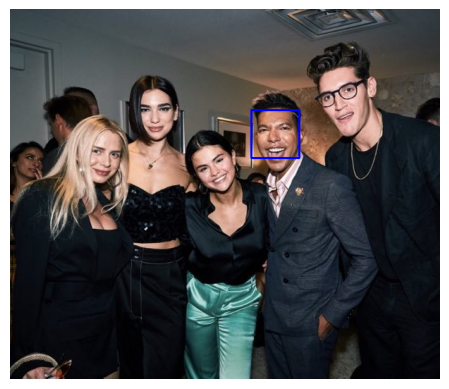

Moins de deux yeux détectés, alignement non effectué.


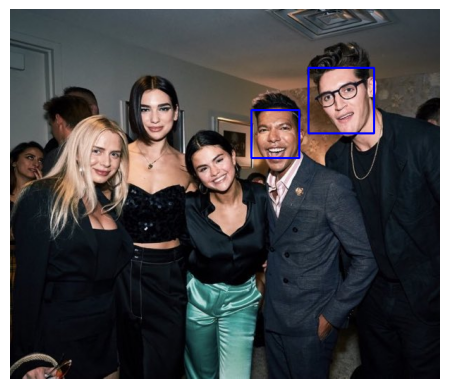

Moins de deux yeux détectés, alignement non effectué.


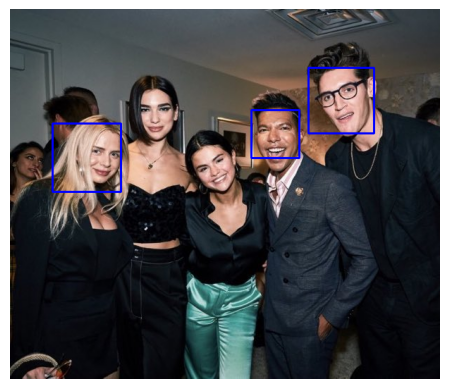

Moins de deux yeux détectés, alignement non effectué.


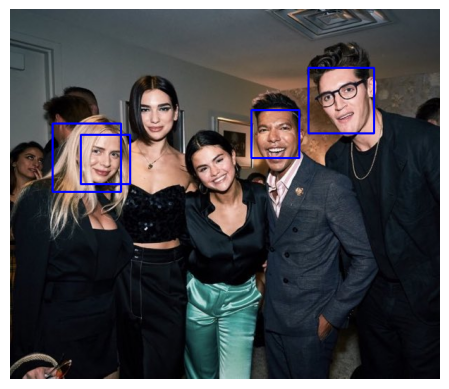

Moins de deux yeux détectés, alignement non effectué.


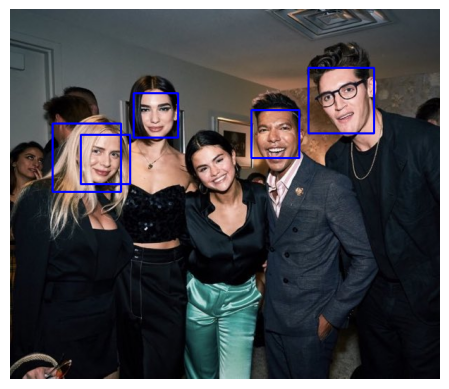

In [26]:
process_image(images)

In [15]:
print(type(images))

<class 'str'>


In [16]:
import os 
print(os.path.exists(images))

True


In [30]:
image_profile="C:/Users/mahen/Intranet/Modele_IA/images/profil_picture/selena_profile_picture.jpg"

Moins de deux yeux détectés, alignement non effectué.


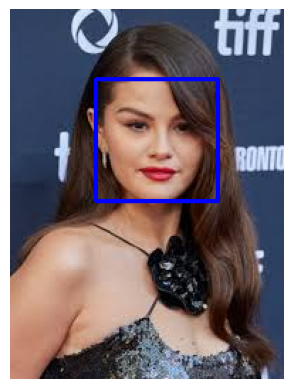

In [31]:
process_image(image_profile)